In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("cars.csv")
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [5]:
df['normalized-losses'].replace('?',np.nan,inplace=True)
df['normalized-losses']=df['normalized-losses'].astype("float")
df['normalized-losses'].fillna(df['normalized-losses'].mean(),inplace=True)

df['horsepower'].replace('?',np.nan,inplace=True)
df['horsepower']=df['horsepower'].astype("float")
df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)


In [40]:
df.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.232919,-0.541038,-0.105790,0.071389,-0.035823,0.034606,-0.085781
normalized-losses,0.465190,1.000000,0.084195,-0.370706,0.110997,0.203434,-0.218749,-0.178221,0.133424
width,-0.232919,0.084195,1.000000,0.279210,0.735433,0.642195,-0.642704,-0.677218,0.718253
height,-0.541038,-0.370706,0.279210,1.000000,0.067149,-0.110137,-0.048640,-0.107358,0.132444
engine-size,-0.105790,0.110997,0.735433,0.067149,1.000000,0.810713,-0.653658,-0.677470,0.852995
horsepower,0.071389,0.203434,0.642195,-0.110137,0.810713,1.000000,-0.803162,-0.770903,0.746589
city-mpg,-0.035823,-0.218749,-0.642704,-0.048640,-0.653658,-0.803162,1.000000,0.971337,-0.654611
highway-mpg,0.034606,-0.178221,-0.677218,-0.107358,-0.677470,-0.770903,0.971337,1.000000,-0.679048
price,-0.085781,0.133424,0.718253,0.132444,0.852995,0.746589,-0.654611,-0.679048,1.000000


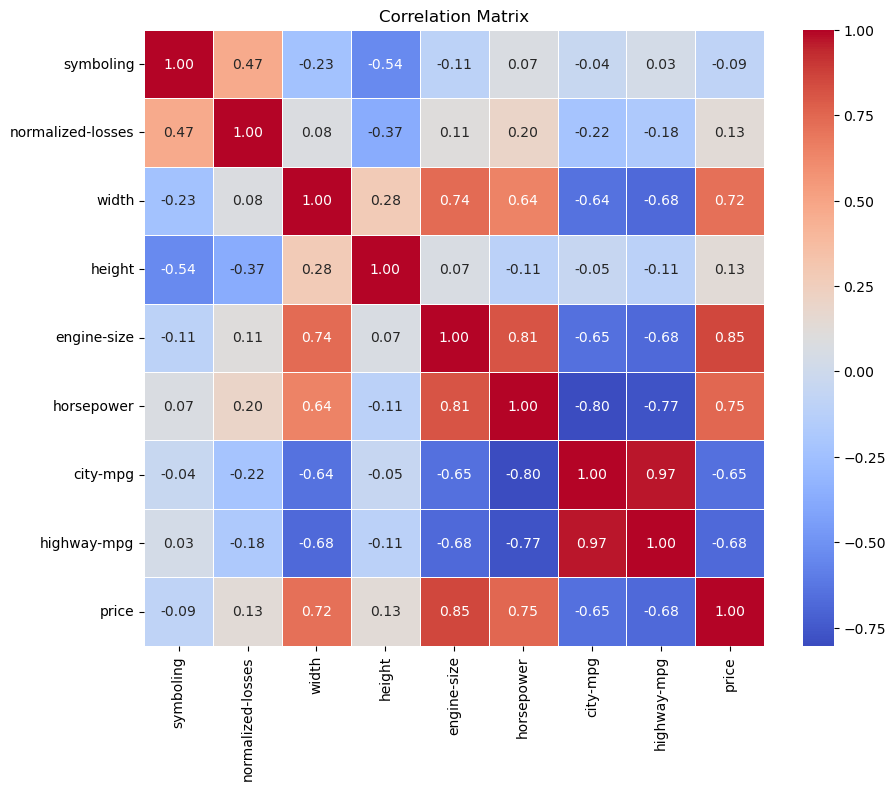

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


In [6]:
x=df.iloc[:,:-1]
y=df['price']

In [7]:
x

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27


In [8]:
num_feature=x.select_dtypes(['int64','float64'])
cat_feature=x.select_dtypes(object).columns

In [9]:
num_feature

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,64.1,48.8,130,111.0,21,27
1,3,122.0,64.1,48.8,130,111.0,21,27
2,1,122.0,65.5,52.4,152,154.0,19,26
3,2,164.0,66.2,54.3,109,102.0,24,30
4,2,164.0,66.4,54.3,136,115.0,18,22
...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28
201,-1,95.0,68.8,55.5,141,160.0,19,25
202,-1,95.0,68.9,55.5,173,134.0,18,23
203,-1,95.0,68.9,55.5,145,106.0,26,27


In [10]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[cat_feature]=oe.fit_transform(x[cat_feature])

In [11]:
x[cat_feature]

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0.0,1.0,0.0,2.0,0.0,0.0
1,0.0,1.0,0.0,2.0,0.0,0.0
2,0.0,1.0,2.0,2.0,0.0,5.0
3,1.0,1.0,3.0,1.0,0.0,3.0
4,1.0,1.0,3.0,0.0,0.0,3.0
...,...,...,...,...,...,...
200,21.0,1.0,3.0,2.0,0.0,3.0
201,21.0,1.0,3.0,2.0,0.0,3.0
202,21.0,1.0,3.0,2.0,0.0,5.0
203,21.0,0.0,3.0,2.0,0.0,3.0


In [12]:
x

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
1,3,122.0,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
2,1,122.0,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26
3,2,164.0,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30
4,2,164.0,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28
201,-1,95.0,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25
202,-1,95.0,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23
203,-1,95.0,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27


In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=1)


In [18]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression
lreg.fit(xtrain,ytrain)
ypred=lreg.predict(xtest)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lreg = LinearRegression()
lreg.fit(xtrain, ytrain)
ypred = lreg.predict(xtest)
# Calculate R^2 score
r2_linear = r2_score(ytest, ypred)
# Print the result
print(f"Linear Regression R^2 Score: {r2_linear}")


Linear Regression R^2 Score: 0.796556678039738


In [19]:
train=lreg.score(xtrain,ytrain) #training accuracy
test=lreg.score(xtest,ytest)    #testing accuracy
print(f"training result: {train}")
print(f"testing result: {test}")

training result: 0.8504573774895472
testing result: 0.796556678039738


In [20]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(ytest, ypred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 2464.0068217581634


In [21]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(ytest, ypred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 12259459.688784527


In [22]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 3501.351123321471


In [23]:
from sklearn.linear_model import Ridge,Lasso


In [24]:
l2=Ridge(alpha=5)
#alpha value imporves quality of data and reduce variance
l2.fit(xtrain,ytrain)

Ridge(alpha=5)

In [25]:
train=l2.score(xtrain,ytrain) #training accuracy
test=l2.score(xtest,ytest)    #testing accuracy
print(f"training result: {train}")
print(f"testing result: {test}")

training result: 0.8214255248858177
testing result: 0.8141745853539419


In [26]:
#hypertuning of alpha/lambda value
for i in range(1,31):
    l2=Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    test=l2.score(xtest,ytest)
    print(f"Value of alpha: {i}, Test score: {test}")
    

Value of alpha: 1, Test score: 0.8074518758147275
Value of alpha: 2, Test score: 0.8110292248150515
Value of alpha: 3, Test score: 0.8126933383890035
Value of alpha: 4, Test score: 0.8136148645029301
Value of alpha: 5, Test score: 0.8141745853539419
Value of alpha: 6, Test score: 0.8145301242133358
Value of alpha: 7, Test score: 0.8147582608502816
Value of alpha: 8, Test score: 0.8149010602831955
Value of alpha: 9, Test score: 0.8149836949253055
Value of alpha: 10, Test score: 0.8150222867376531
Value of alpha: 11, Test score: 0.8150277245431793
Value of alpha: 12, Test score: 0.8150076788279422
Value of alpha: 13, Test score: 0.8149677381788261
Value of alpha: 14, Test score: 0.8149120868051176
Value of alpha: 15, Test score: 0.814843927825252
Value of alpha: 16, Test score: 0.8147657584947391
Value of alpha: 17, Test score: 0.8146795554128126
Value of alpha: 18, Test score: 0.8145869029046838
Value of alpha: 19, Test score: 0.8144890843369585
Value of alpha: 20, Test score: 0.8143871

In [27]:
#final l2 model with best aplha value ie global minima or sweet point
l2=Ridge(alpha=11)
l2.fit(xtrain,ytrain)
train=l2.score(xtrain,ytrain) 
test=l2.score(xtest,ytest)    
print(f"training result: {train}")
print(f"testing result: {test}")

training result: 0.8096241695970483
testing result: 0.8150277245431793


In [28]:
for i in range(201,250):
    l1=Lasso(alpha=i)
    l1.fit(xtrain,ytrain)
    test=l1.score(xtest,ytest)
    print(f"Value of alpha: {i}, Test score: {test}")

Value of alpha: 201, Test score: 0.813927957137811
Value of alpha: 202, Test score: 0.8139350500231186
Value of alpha: 203, Test score: 0.8139413059100369
Value of alpha: 204, Test score: 0.8139467248187293
Value of alpha: 205, Test score: 0.8139513265533345
Value of alpha: 206, Test score: 0.8139550696905882
Value of alpha: 207, Test score: 0.813957976200077
Value of alpha: 208, Test score: 0.8139600462264518
Value of alpha: 209, Test score: 0.8139612946966912
Value of alpha: 210, Test score: 0.8139616905048537
Value of alpha: 211, Test score: 0.8139612621302252
Value of alpha: 212, Test score: 0.8139599844090182
Value of alpha: 213, Test score: 0.8139578792562548
Value of alpha: 214, Test score: 0.8139549358523643
Value of alpha: 215, Test score: 0.8139511546552202
Value of alpha: 216, Test score: 0.8139465363340636
Value of alpha: 217, Test score: 0.8139410828439788
Value of alpha: 218, Test score: 0.8139347914807858
Value of alpha: 219, Test score: 0.8139276614848872
Value of alpha

In [29]:
#best alpha value final lasso model
l1=Lasso(alpha=210)
l1.fit(xtrain,ytrain)
train=l1.score(xtrain,ytrain) 
test=l1.score(xtest,ytest)    
print(f"training result: {train}")
print(f"testing result: {test}")

training result: 0.793474564842352
testing result: 0.8139616905048537


In [34]:
result_df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred})
# Display the DataFrame
print(result_df)
# Calculate the updated R^2 score
r2_updated = r2_score(ytest, ypred)
# Print the updated R^2 score
print(f"Updated R^2 Score: {r2_updated}")

     Actual     Predicted
78     6669   6147.971775
97     7999   6877.020186
151    6338   5163.922730
44    10000   6529.641523
40    10295   9097.484161
..      ...           ...
39     8845  11229.005024
110   13860  22671.493609
164    8238   8339.018669
56    11845   9507.839324
176   10898  11200.815084

[62 rows x 2 columns]
Updated R^2 Score: 0.796556678039738


In [38]:
lreg.intercept_ #intercept value

-65022.769859956774

In [46]:
lreg.coef_ #slope


array([ 4.51384957e+01,  1.53127607e+00, -2.00099087e+02, -6.22650015e+02,
       -1.70235175e+02,  1.86860719e+03,  1.64133620e+04,  7.89452171e+02,
        3.62663990e+02,  2.83174279e+02,  9.83682875e+01, -1.08169245e+01,
        3.08017854e+02, -4.17024371e+02])